In [63]:
import glob
import csv
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt


In [64]:
files_path = r'C:\Users\math_\OneDrive\DaFi-Project\no-git-Impact-of-Burned-on-Brazilian-Agribusiness-Stocks\dpi-inpe-data\*.CSV'

data_burned = pd.DataFrame()

for file in glob.glob(files_path):

    df_burned_year = pd.read_csv(file, delimiter=",")

    data_burned = pd.concat([data_burned, df_burned_year])

In [65]:
data_burned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574745 entries, 0 to 189900
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   DataHora      574745 non-null  object 
 1   Satelite      574745 non-null  object 
 2   Pais          574745 non-null  object 
 3   Estado        574745 non-null  object 
 4   Municipio     574745 non-null  object 
 5   Bioma         574745 non-null  object 
 6   DiaSemChuva   566025 non-null  float64
 7   Precipitacao  566025 non-null  float64
 8   RiscoFogo     566025 non-null  float64
 9   Latitude      574745 non-null  float64
 10  Longitude     574745 non-null  float64
 11  FRP           574745 non-null  float64
dtypes: float64(6), object(6)
memory usage: 57.0+ MB


In [66]:
data_burned['DataHora'] = pd.to_datetime(data_burned['DataHora'], format='%Y/%m/%d %H:%M:%S')

data_burned = data_burned.drop(columns='Pais')

In [67]:
display(data_burned)

,DataHora,Satelite,Estado,Municipio,Bioma,DiaSemChuva,Precipitacao,RiscoFogo,Latitude,Longitude,FRP
0,2021-12-05 16:54:00,AQUA_M-T,PARÁ,MOJU,Amazônia,0.0,7.3,0.00,-3.05079,-49.48395,14.4
1,2021-12-05 16:49:00,AQUA_M-T,SÃO PAULO,BARRA DO TURVO,Mata Atlântica,8.0,8.7,0.20,-24.85887,-48.50217,9.0
2,2021-12-05 16:54:00,AQUA_M-T,PARÁ,ALMEIRIM,Amazônia,1.0,11.0,0.00,-1.39502,-52.67188,30.7
3,2021-12-05 16:54:00,AQUA_M-T,CEARÁ,GRANJA,Caatinga,1.0,0.3,0.70,-3.07819,-40.74868,46.8
4,2021-12-05 16:54:00,AQUA_M-T,PARÁ,MEDICILÂNDIA,Amazônia,1.0,1.5,0.00,-3.06516,-52.92874,9.3
...,...,...,...,...,...,...,...,...,...,...,...
189896,2023-07-27 18:02:00,AQUA_M-T,AMAZONAS,APUÍ,Amazônia,12.0,0.0,0.46,-6.93483,-59.52313,82.0
189897,2023-07-27 18:02:00,AQUA_M-T,AMAZONAS,APUÍ,Amazônia,12.0,0.0,0.45,-6.93405,-59.56060,160.6
189898,2023-07-27 18:02:00,AQUA_M-T,AMAZONAS,APUÍ,Amazônia,12.0,0.0,0.46,-6.93259,-59.55067,40.4
189899,2023-07-27 18:02:00,AQUA_M-T,AMAZONAS,APUÍ,Amazônia,12.0,0.0,0.46,-6.93112,-59.54064,751.6


In [68]:
(data_burned).to_csv(r'C:\Users\math_\OneDrive\DaFi-Project\no-git-Impact-of-Burned-on-Brazilian-Agribusiness-Stocks\data_burned.csv', index=False)

In [69]:
df_data_burned = pd.DataFrame({'Data_Hora': data_burned['DataHora'],
                               'Latitude': data_burned['Latitude'],
                               'Longitude': data_burned['Longitude'],
                               'DiaSemChuva': data_burned['DiaSemChuva'],
                               'Precipitacao': data_burned['Precipitacao'],
                               'RiscoFogo': data_burned['RiscoFogo'],
                               'FRP': data_burned['FRP']})

In [70]:
display(df_data_burned)

,Data_Hora,Latitude,Longitude,DiaSemChuva,Precipitacao,RiscoFogo,FRP
0,2021-12-05 16:54:00,-3.05079,-49.48395,0.0,7.3,0.00,14.4
1,2021-12-05 16:49:00,-24.85887,-48.50217,8.0,8.7,0.20,9.0
2,2021-12-05 16:54:00,-1.39502,-52.67188,1.0,11.0,0.00,30.7
3,2021-12-05 16:54:00,-3.07819,-40.74868,1.0,0.3,0.70,46.8
4,2021-12-05 16:54:00,-3.06516,-52.92874,1.0,1.5,0.00,9.3
...,...,...,...,...,...,...,...
189896,2023-07-27 18:02:00,-6.93483,-59.52313,12.0,0.0,0.46,82.0
189897,2023-07-27 18:02:00,-6.93405,-59.56060,12.0,0.0,0.45,160.6
189898,2023-07-27 18:02:00,-6.93259,-59.55067,12.0,0.0,0.46,40.4
189899,2023-07-27 18:02:00,-6.93112,-59.54064,12.0,0.0,0.46,751.6


In [71]:
(df_data_burned).to_csv(r'C:\Users\math_\OneDrive\DaFi-Project\no-git-Impact-of-Burned-on-Brazilian-Agribusiness-Stocks\df_data_burned.csv', index=False)

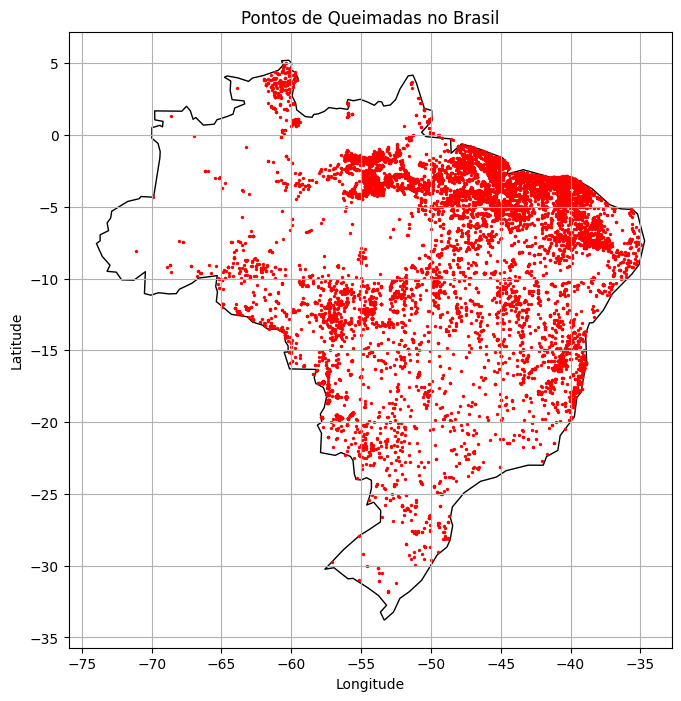

In [72]:
df_data_burned_plot = df_data_burned[df_data_burned['Data_Hora'].dt.year == 2023]
df_data_burned_plot = df_data_burned_plot[df_data_burned_plot['Data_Hora'].dt.month == 12]

brazil = gpd.read_file(r"data\ne_110m_admin_0_countries\ne_110m_admin_0_countries.shp")
brazil = brazil[brazil['NAME'] == 'Brazil']

geometry = [Point(xy) for xy in zip(df_data_burned_plot['Longitude'], df_data_burned_plot['Latitude'])]
geo_df = gpd.GeoDataFrame(df_data_burned_plot, geometry=geometry, crs="EPSG:4326")

plt.figure(figsize=(8, 8))
brazil.plot(ax=plt.gca(), color='white', edgecolor='black')
geo_df.plot(ax=plt.gca(), marker='o', color='red', markersize=2)

plt.title('Pontos de Queimadas no Brasil')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

plt.show()
